In [100]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

from scipy.ndimage import gaussian_filter
import matplotlib.cm as cm

In [101]:
np.set_printoptions(precision=3, suppress=True)
print(tf.__version__)

2.9.1


In [102]:
raw_seda = pd.read_csv('seda_geodist_long_gcs_4.1.csv')

In [103]:
raw_seda = raw_seda.drop(labels=['sedaleaname','fips','stateabb','sedalea','gcs_mn_all','gcs_mnse_all','gcs_mnse_asn','gcs_mnse_blk','gcs_mnse_ecd','gcs_mnse_fem','gcs_mnse_hsp','gcs_mnse_mal','gcs_mn_mfg','gcs_mnse_mfg','gcs_mn_mtr','gcs_mnse_mtr','gcs_mnse_nam','gcs_mnse_nec','gcs_mn_neg','gcs_mnse_neg','totgyb_neg','gcs_mn_wag','gcs_mnse_wag','totgyb_wag','gcs_mn_wbg','gcs_mnse_wbg','totgyb_wbg','gcs_mn_whg','gcs_mnse_whg','totgyb_whg','gcs_mnse_wht','gcs_mn_wmg','gcs_mnse_wmg','totgyb_wmg','gcs_mn_wng','gcs_mnse_wng','totgyb_wng'], axis=1)

In [104]:
raw_seda['pct_asn'] = raw_seda['totgyb_asn'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_blk'] = raw_seda['totgyb_blk'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_hsp'] = raw_seda['totgyb_hsp'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_nam'] = raw_seda['totgyb_nam'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_wht'] = raw_seda['totgyb_wht'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_mal'] = raw_seda['totgyb_mal'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_fem'] = raw_seda['totgyb_fem'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_ecd'] = raw_seda['totgyb_ecd'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_nec'] = raw_seda['totgyb_nec'] / raw_seda['totgyb_all'] * 100
raw_seda = raw_seda.drop(columns=['totgyb_all','totgyb_asn', 'totgyb_blk','totgyb_ecd','totgyb_fem','totgyb_hsp','totgyb_mal','totgyb_nam','totgyb_nec','totgyb_wht'])

In [105]:
seda = pd.DataFrame()
temp = pd.DataFrame()

In [106]:
temp = raw_seda[['subject','grade','year','gcs_mn_asn','pct_asn']].copy()
temp = temp.rename(columns={'gcs_mn_asn':'score','pct_asn':'cohort_pct'})
temp = temp.dropna()
temp['asian'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_blk','pct_blk']].copy()
temp = temp.rename(columns={'gcs_mn_blk':'score','pct_blk':'cohort_pct'})
temp = temp.dropna()
temp['african american'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_hsp','pct_hsp']].copy()
temp = temp.rename(columns={'gcs_mn_hsp':'score','pct_hsp':'cohort_pct'})
temp = temp.dropna()
temp['hispanic'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_nam','pct_nam']].copy()
temp = temp.rename(columns={'gcs_mn_nam':'score','pct_nam':'cohort_pct'})
temp = temp.dropna()
temp['native american'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_wht','pct_wht']].copy()
temp = temp.rename(columns={'gcs_mn_wht':'score','pct_wht':'cohort_pct'})
temp = temp.dropna()
temp['white'] = 1

seda = pd.concat([seda, temp])

In [107]:
temp = raw_seda[['subject','grade','year','gcs_mn_ecd','pct_ecd']].copy()
temp = temp.rename(columns={'gcs_mn_ecd':'score','pct_ecd':'cohort_pct'})
temp = temp.dropna()
temp['ECD'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_nec','pct_nec']].copy()
temp = temp.rename(columns={'gcs_mn_nec':'score','pct_nec':'cohort_pct'})
temp = temp.dropna()
temp['nec'] = 1

seda = pd.concat([seda, temp])

In [108]:
temp = raw_seda[['subject','grade','year','gcs_mn_fem', 'pct_fem']].copy()
temp = temp.rename(columns={'gcs_mn_fem':'score','pct_fem':'cohort_pct'})
temp = temp.dropna()
temp['female'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_mal', 'pct_mal']].copy()
temp = temp.rename(columns={'gcs_mn_mal':'score','pct_mal':'cohort_pct'})
temp = temp.dropna()
temp['male'] = 1

seda = pd.concat([seda, temp])

In [109]:
seda = seda.fillna(0)
seda['cohort_pct'] = seda['cohort_pct'].replace(to_replace=0, value=-1)

seda = seda.sample(frac=1)

In [110]:
subject_dict = {'mth': 0, 'rla': 1}
seda = seda.replace({'subject': subject_dict})

In [111]:
train_set = seda.sample(frac=0.8, random_state=2)
test_set = seda.drop(train_set.index)

train_set.to_numpy()
test_set.to_numpy()

train_features = train_set.copy()
test_features = test_set.copy()

train_labels = train_features.pop('score')
test_labels = test_features.pop('score')

In [112]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [113]:
model = keras.Sequential([
      normalizer,
      layers.Dense(8, activation='relu'),
      layers.Dense(1)
  ])

In [114]:
 model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [115]:
    history = model.fit(
        train_features,
        train_labels,
        validation_split=0.2,
        epochs=3)

Epoch 1/3
107578/107578 [==============================] - 144s 1ms/step - loss: 0.9088 - val_loss: 0.8917
Epoch 2/3
107578/107578 [==============================] - 142s 1ms/step - loss: 0.8883 - val_loss: 0.8880
Epoch 3/3
107578/107578 [==============================] - 140s 1ms/step - loss: 0.8868 - val_loss: 0.8857


In [116]:
input = np.array([
    1, # Subject (math: 0, reading: 1)
    8, # Grade
    2015, # Year
    75, # Cohort Percentage
    0, # Asian
    0, # African American
    0, # Hispanic
    0, # Native American
    0, # White
    0, # ECD
    0, # NEC
    0, # Male
    0, # Female
])
model.predict(input)

1/1 [==============================] - 0s 70ms/step


array([[9.255]], dtype=float32)

671/671 [==============================] - 1s 927us/step


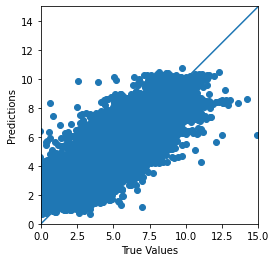

In [117]:
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

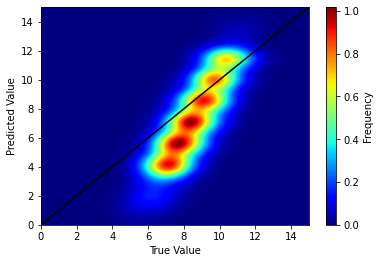

In [118]:
def heatmap(x, y, smoothing, bins=(512,512)):
    heatmap, x, y = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=smoothing)

    extent = [0, 15, 0, 15]
    return heatmap.T, extent

# Adjust what the max income shown on the heatmap is 
x = test_labels
y = test_predictions

# Smooting Factor (Standard deviation for Gaussian Filter.) Blurs or smooths the heatmap for a better look.
smoothing = 16

# Displays the HeatMap
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
img, extent = heatmap(x, y, smoothing)
plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet, aspect='auto')

# Displays the colourbar on the side
plt.rcParams["axes.formatter.limits"] = (-5, 7)
cb = plt.colorbar()
cb.set_label('Frequency')

_ = plt.plot(lims, lims, color='black')

plt.show()

In [119]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xticks(np.arange(0, 3, 1))
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

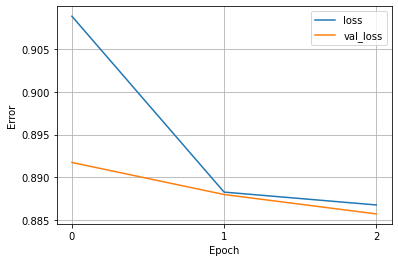

In [120]:
plot_loss(history)

In [121]:
test_results = model.evaluate(test_features, test_labels, verbose=0)
print(test_results)

0.9946413636207581


In [122]:
# Feature Importance
def permutate_col(column):
    permutated_test_features = test_features.copy()
    permutated_test_features[column] = np.random.permutation(permutated_test_features[column])
    return permutated_test_features
    

In [123]:
print(len(test_features.columns))
test_features.head()
col_name = []
scores = []
for col in test_features.columns:
    permutated_col = permutate_col(col)
    score = model.evaluate(permutated_col, test_labels, verbose=0)
    col_name.append(col)
    scores.append(score)
feature_importance = pd.DataFrame({'Permutated Column':col_name,"Loss":scores})
feature_importance = feature_importance.sort_values(by='Loss', axis=0)
print(feature_importance)

13
   Permutated Column      Loss
0            subject  0.998657
4              asian  0.998970
2               year  1.002159
7    native american  1.006079
5   african american  1.012655
6           hispanic  1.013161
3         cohort_pct  1.028223
11            female  1.042586
10               nec  1.073712
12              male  1.077064
9                ECD  1.098007
8              white  1.334743
1              grade  2.149942


In [124]:
feature_importance = feature_importance.drop(1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

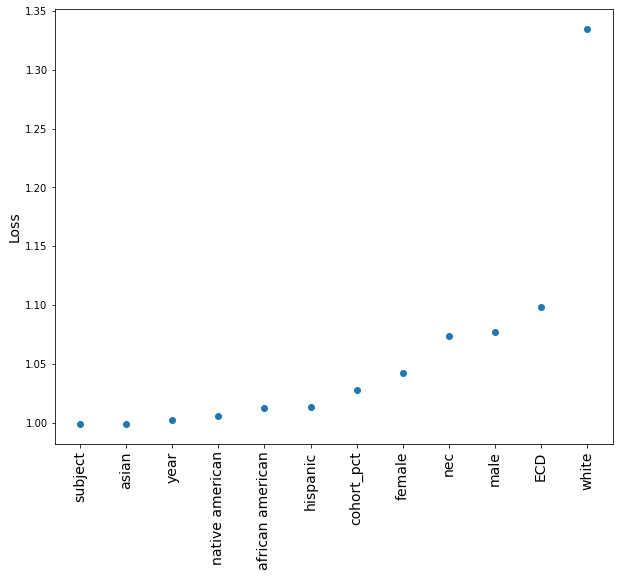

In [125]:
x = feature_importance['Permutated Column'].astype(str)
y = feature_importance['Loss']
plt.figure(figsize=(10,8))
plt.ylabel('Loss', fontsize=14)
plt.scatter(x=x, y=y)
plt.xticks(rotation = 90, fontsize=14)

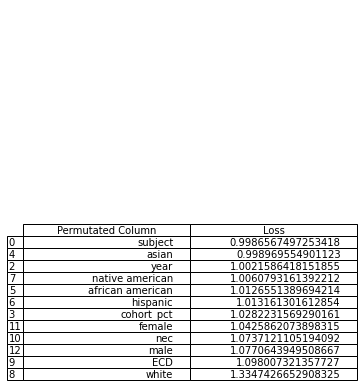

In [126]:
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax, feature_importance)

In [127]:
seda.head()

,subject,grade,year,score,cohort_pct,asian,african american,hispanic,native american,white,ECD,nec,female,male
811010,1,4,2011,5.515386,4.679803,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101656,1,8,2016,7.253907,51.515152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65267,0,5,2012,5.057503,100.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1295381,0,4,2011,4.235619,53.061224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1031686,0,4,2017,3.018982,14.430380,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
